<a href="https://colab.research.google.com/github/Lisa-Tera/best-modern-ai/blob/main/Emotion_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1. FACIAL KEY POINTS DETECTION



---




# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/modern_AI/2.Emotion Al

/content/drive/MyDrive/modern_AI/2.Emotion Al


In [ ]:
# Import the necessary packages

import pandas as pd #데이터 프레임
import numpy as np #수치해석
import os #운영체제
import PIL #pillow 이미지 다루는데 사용
import seaborn as sns #데이터 시각화
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
# load facial key points data
keyfacial_df = pd.read_csv('data.csv') # /content/drive/MyDrive/modern_AI/2.Emotion Al/data.csv 도 되지만 위에 %cd 로 이미 설정

In [ ]:
keyfacial_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

맨 마지막 : 이미지의 실제 픽셀 값
0:black | 255: white

In [ ]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float



*   15개 포인트의 x,y 로 30개 + 이미지 픽셀값 = 31개
*   데이터타입 모두 float      | 이미지는 다름
*   memory usage :데이터 크기

In [ ]:
keyfacial_df.isnull().sum() #null값 확인

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
keyfacial_df['Image'].shape

(2140,)

In [ ]:
keyfacial_df['Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
2135    191 191 191 190 189 185 184 120 54 34 19 24 31...
2136    19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137    31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138    7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139    68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...
Name: Image, Length: 2140, dtype: object

shape한 뒤 데이터 reshape

In [ ]:
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))
#lambda를 이용해서 string으로 되어있는 x를 띄어쓰기로 구분해서 int로 바꾼 배열로 reshape

In [ ]:
# O번째 행 확인
keyfacial_df['Image'][0].shape

(96, 96)

In [ ]:
keyfacial_df['Image'] #배열로 바뀜!!

0       [[238, 236, 237, 238, 240, 240, 239, 241, 241,...
1       [[219, 215, 204, 196, 204, 211, 212, 200, 180,...
2       [[144, 142, 159, 180, 188, 188, 184, 180, 167,...
3       [[193, 192, 193, 194, 194, 194, 193, 192, 168,...
4       [[147, 148, 160, 196, 215, 214, 216, 217, 219,...
                              ...                        
2135    [[191, 191, 191, 190, 189, 185, 184, 120, 54, ...
2136    [[19, 19, 19, 18, 13, 7, 3, 4, 3, 1, 3, 9, 11,...
2137    [[31, 40, 47, 31, 54, 58, 63, 100, 86, 80, 82,...
2138    [[7, 1, 5, 1, 3, 20, 12, 0, 5, 8, 6, 18, 13, 9...
2139    [[68, 19, 19, 23, 19, 26, 23, 16, 8, 15, 9, 9,...
Name: Image, Length: 2140, dtype: object

**MINI CHALLENGE #1:**
- Obtain the average, minimum and maximum values for 'right_eye_center_x'

In [ ]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

# TASK #3: PERFORM IMAGE VISUALIZATION

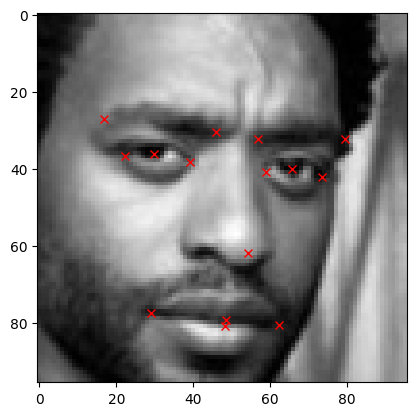

In [ ]:
i = np.random.randint(1, len(keyfacial_df))# 1~key_df의 길이 사이의 랜덤한 수
plt.imshow(keyfacial_df['Image'][i],cmap = 'gray') #이미지 출력

for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')
        #x,y 좌표

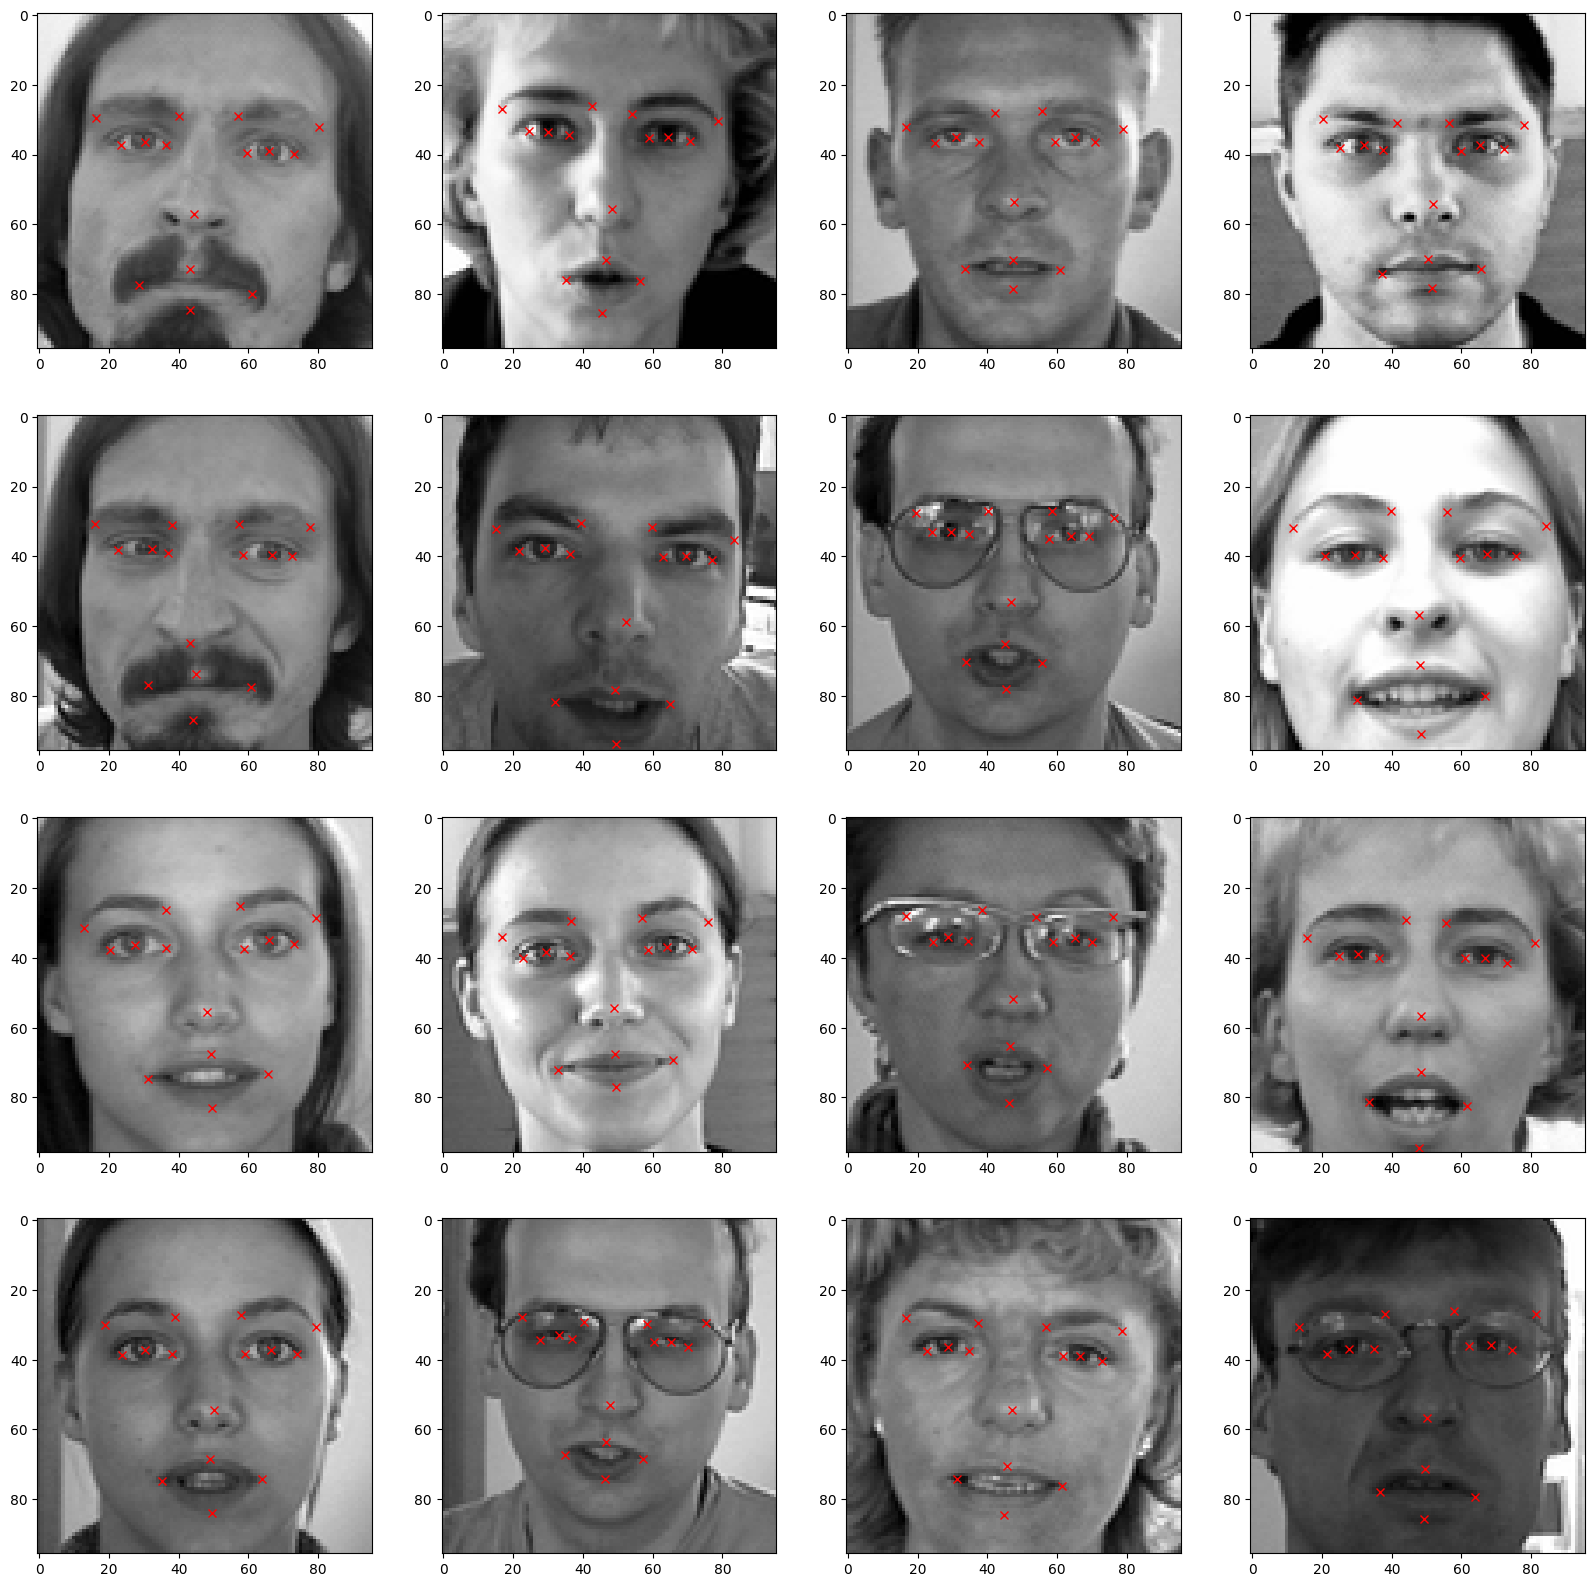

In [ ]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


**MINI CHALLENGE #2:**
- Perform a sanity check on the data by randomly visualizing 64 new images along with their cooresponding key points

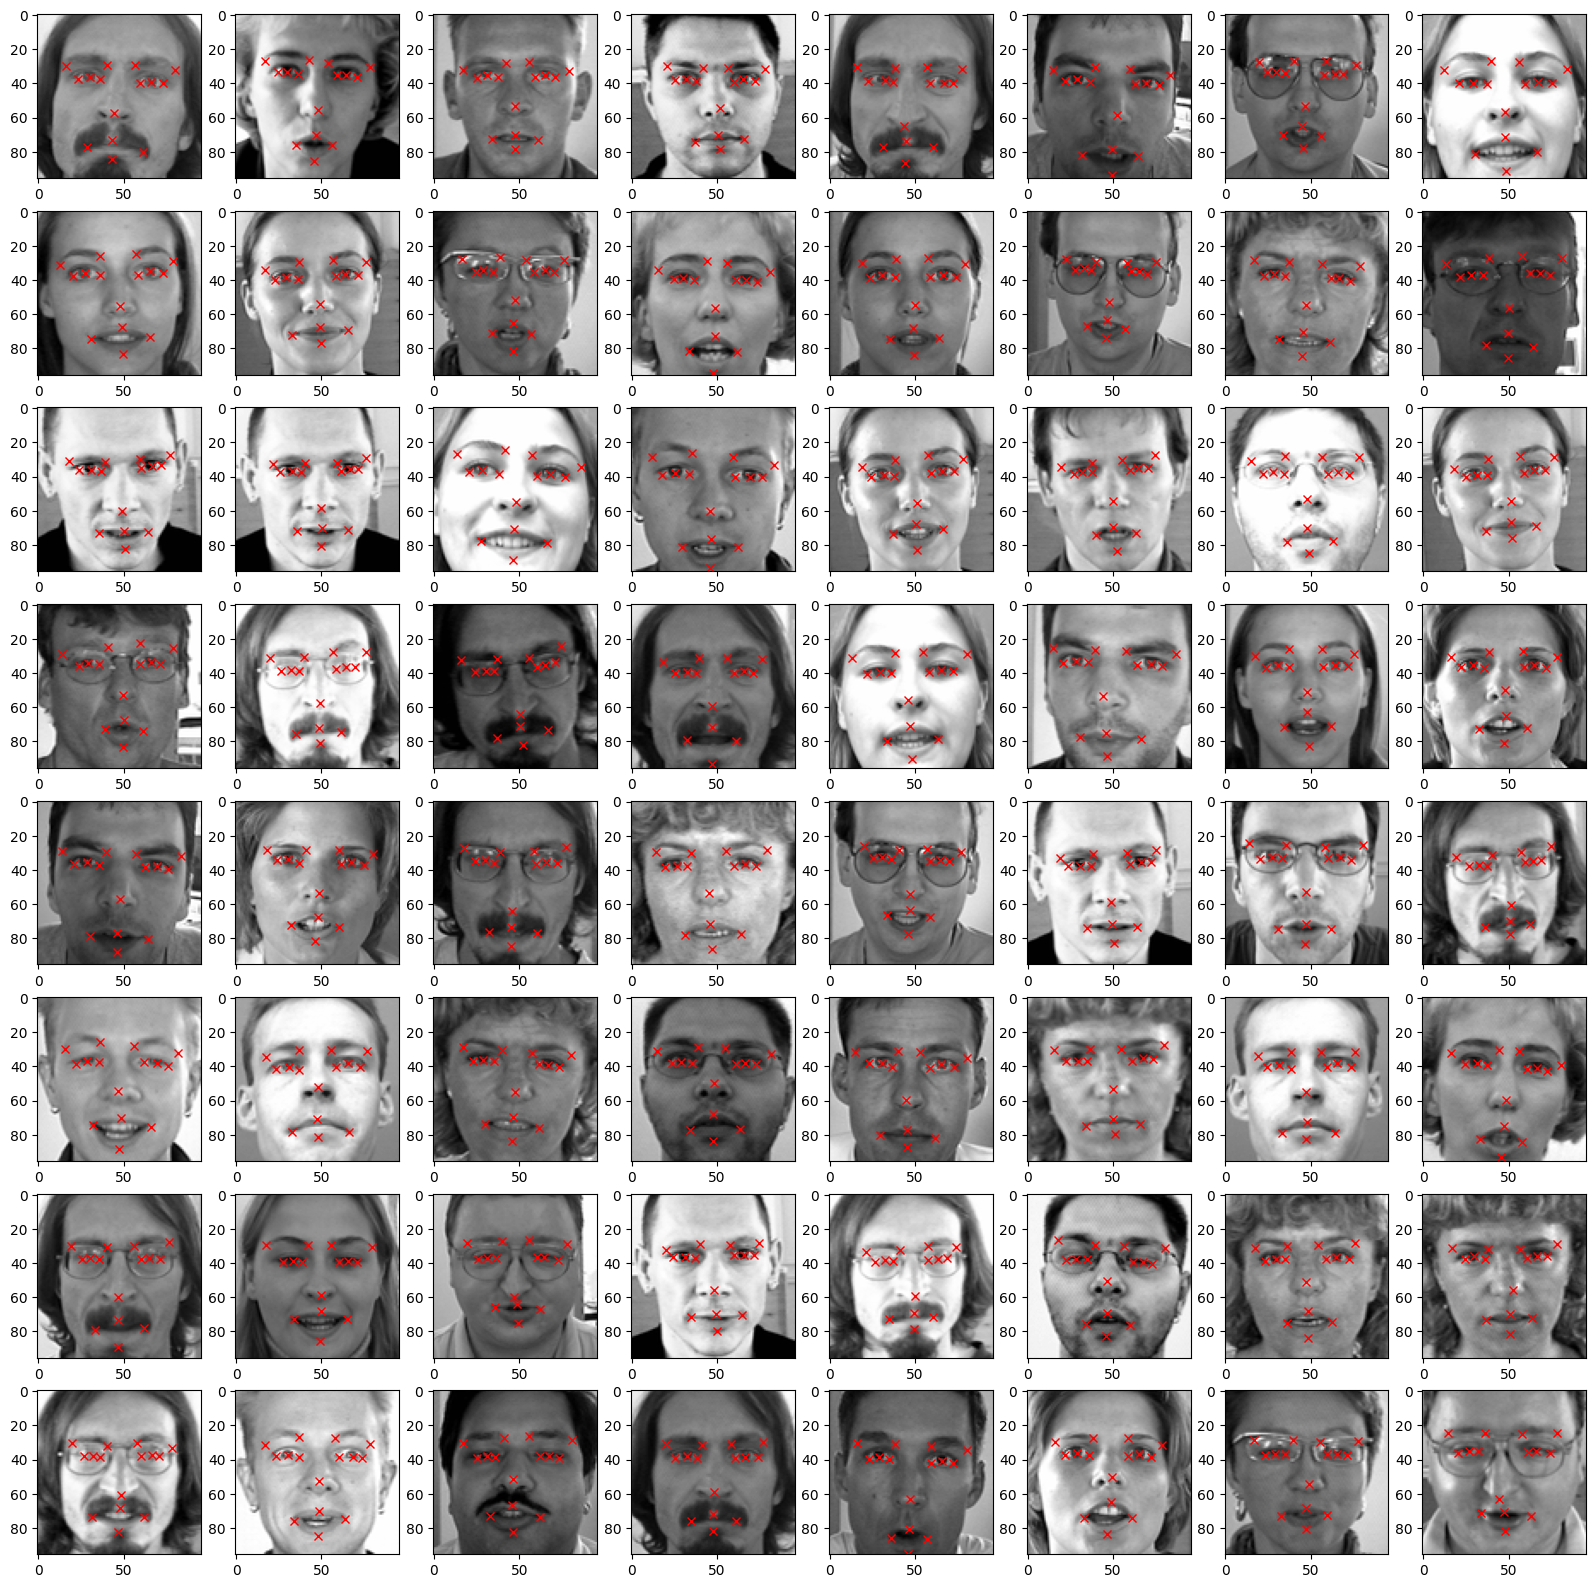

In [ ]:
import random
fig = plt.figure(figsize=(20,20))

for i in range(64):
  k = random.randint(1, len(keyfacial_df))
  ax = fig.add_subplot(8,8,i+1)
  image =plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
  for j in range(1,31,2):
    plt.plot(keyfacial_df.loc[i][j-1],keyfacial_df.loc[i][j], 'rx')

# TASK #4: PERFORM IMAGE AUGMENTATION

In [ ]:
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [ ]:
columns = keyfacial_df_copy.columns[:-1] #이미지 제외한 모든 데이터
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
# y축에 따라 뒤집음 Horizontal Flip - flip the images along y axis
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

# since we are flipping horizontally, y coordinate values would be the same
# Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0: #첫번째, 세번째... 열들
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) ) #96 - 30 = 60으로 데이터 포인트 뒤집음

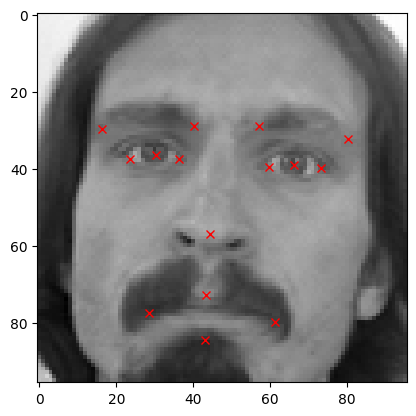

In [ ]:
# 원본 이미지Show the Original image
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

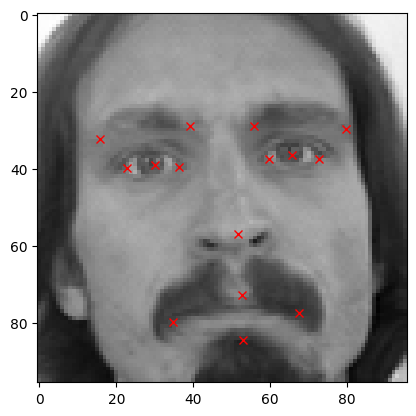

In [ ]:
#좌우 반전된 이미지 Show the Horizontally flipped image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [ ]:
# 이미지 증강_이미지 밝기 변환 Concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy)) # 배열 합치기

In [ ]:
augmented_df.shape #원래 2140개였는데 2배로 증강

(4280, 31)

**part 1 이미지 증강**


1.   밝기
2.   뒤집기



In [ ]:
# Randomingly increasing the brightness of the images
# We multiply pixel values by random values between 1.5 and 2 to increase the brightness of the image
# we clip the value between 0 and 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
#1.5~2 사이의 무작위 값 생성(밝기 조정에 사용), *x하면 밝기가 무작위로 증가, 결과 픽샐을 0~255로 제한,
# np.clip은 0보다 작은 수 0으로 255보다 큰 수 255로
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy)) #이미지 6000개로 증강
augmented_df.shape

(6420, 31)

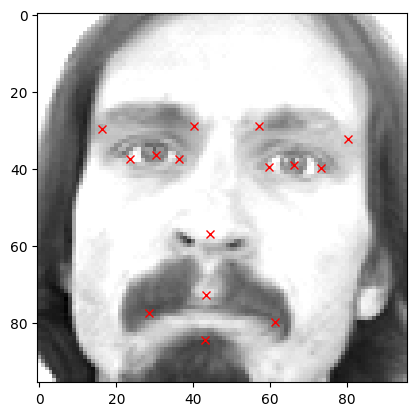

In [ ]:
# Show Image with increased brightness

plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

**MINI CHALLENGE #3:**
-상하반전 Augment images by flipping them vertically
(Hint: Flip along x-axis and note that if we are flipping along x-axis, x co-ordinates won't change)

In [ ]:
# Horizontal Flip - flip the images along y axis
keyfacial_df_copy_flip = copy.copy(keyfacial_df)
keyfacial_df_copy_flip['Image'] = keyfacial_df_copy_flip['Image'].apply(lambda x: np.flip(x, axis = 0))
# 2차원 axis = 0 or 1  0=수직, 1= 수평
# since we are flipping horizontally, y coordinate values would be the same
# Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 1:#수직으로 뒤집으니까 y좌표 편경 columns[x,y,x,y]으로 1이여야 y좌표 변경 가능
    keyfacial_df_copy_flip[columns[i]] = keyfacial_df_copy_flip[columns[i]].apply(lambda x: 96. - float(x) )


**MINI CHALLENGE #4:**
- Perform a sanity check and visualize sample images

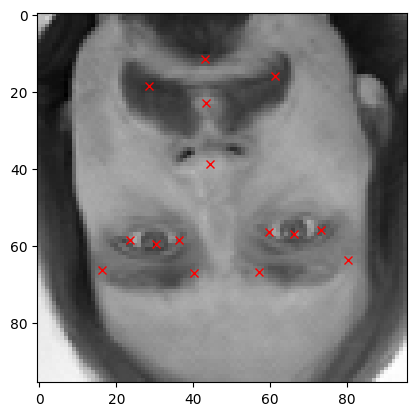

In [ ]:
plt.imshow(keyfacial_df_copy_flip['Image'][0] , cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy_flip.loc[0][j-1], keyfacial_df_copy_flip.loc[0][j],'rx')

# TASK #5: PERFORM DATA NORMALIZATION AND TRAINING DATA PREPARATION

In [ ]:
# Obtain the value of images which is present in the 31st column (since index start from 0, we refer to 31st column by 30)
img = augmented_df[:,30] #맨 마지막(31) 이미지 배열을 img에 넣어줌

# Normalize the images
img = img/255. #0~255인 이미지 데이터를 0~1사이의 실수로 변경

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1)) #6400개의 이미지에 대해
# 배열의 크기는 (이미지 개수, 이미지 높이, 이미지 너비, 채널 수)

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)# img[i]차원 (96, 96)에서 axis = 2로 (96_높이, 96_너비, 1_채널)으로 확장하여 X의 i번째 위치에 저장

# Convert the array type to float32
X = np.asarray(X).astype(np.float32) #X를 numpy 배열로 변환하고, 데이터 타입을 float32로 변경
X.shape

(6420, 96, 96, 1)

In [ ]:
X1 = np.empty(len(img))
X1

array([4.0474e-320, 2.9644e-321, 0.0000e+000, ..., 0.0000e+000,
       0.0000e+000, 0.0000e+000])

In [ ]:
X[0]

array([[[0.93333334],
        [0.9254902 ],
        [0.92941177],
        ...,
        [0.98039216],
        [0.98039216],
        [0.98039216]],

       [[0.92156863],
        [0.93333334],
        [0.9254902 ],
        ...,
        [0.9764706 ],
        [0.98039216],
        [0.9843137 ]],

       [[0.92941177],
        [0.9254902 ],
        [0.92941177],
        ...,
        [0.9843137 ],
        [0.9843137 ],
        [0.98039216]],

       ...,

       [[0.7294118 ],
        [0.7176471 ],
        [0.70980394],
        ...,
        [0.20392157],
        [0.22352941],
        [0.23529412]],

       [[0.7411765 ],
        [0.7372549 ],
        [0.8117647 ],
        ...,
        [0.23921569],
        [0.27058825],
        [0.30588236]],

       [[0.7490196 ],
        [0.72156864],
        [0.72156864],
        ...,
        [0.27450982],
        [0.29411766],
        [0.3529412 ]]], dtype=float32)

In [ ]:
# Obtain the value of x & y coordinates which are to used as target.
y = augmented_df[:,:30] #columns에서 이미지 열 제외한 모든 x,y좌표들 [x,y,x,y,...,image]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) #90%는 train, 10%는 test
X_train.shape

(5778, 96, 96, 1)

**MINI CHALLENGE #5:**
- Try a different value for 'test_size' and verify that the split was successful

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #80%는 train, 20%는 test
X_train.shape

(5136, 96, 96, 1)

In [ ]:
X_test.shape

(1284, 96, 96, 1)

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

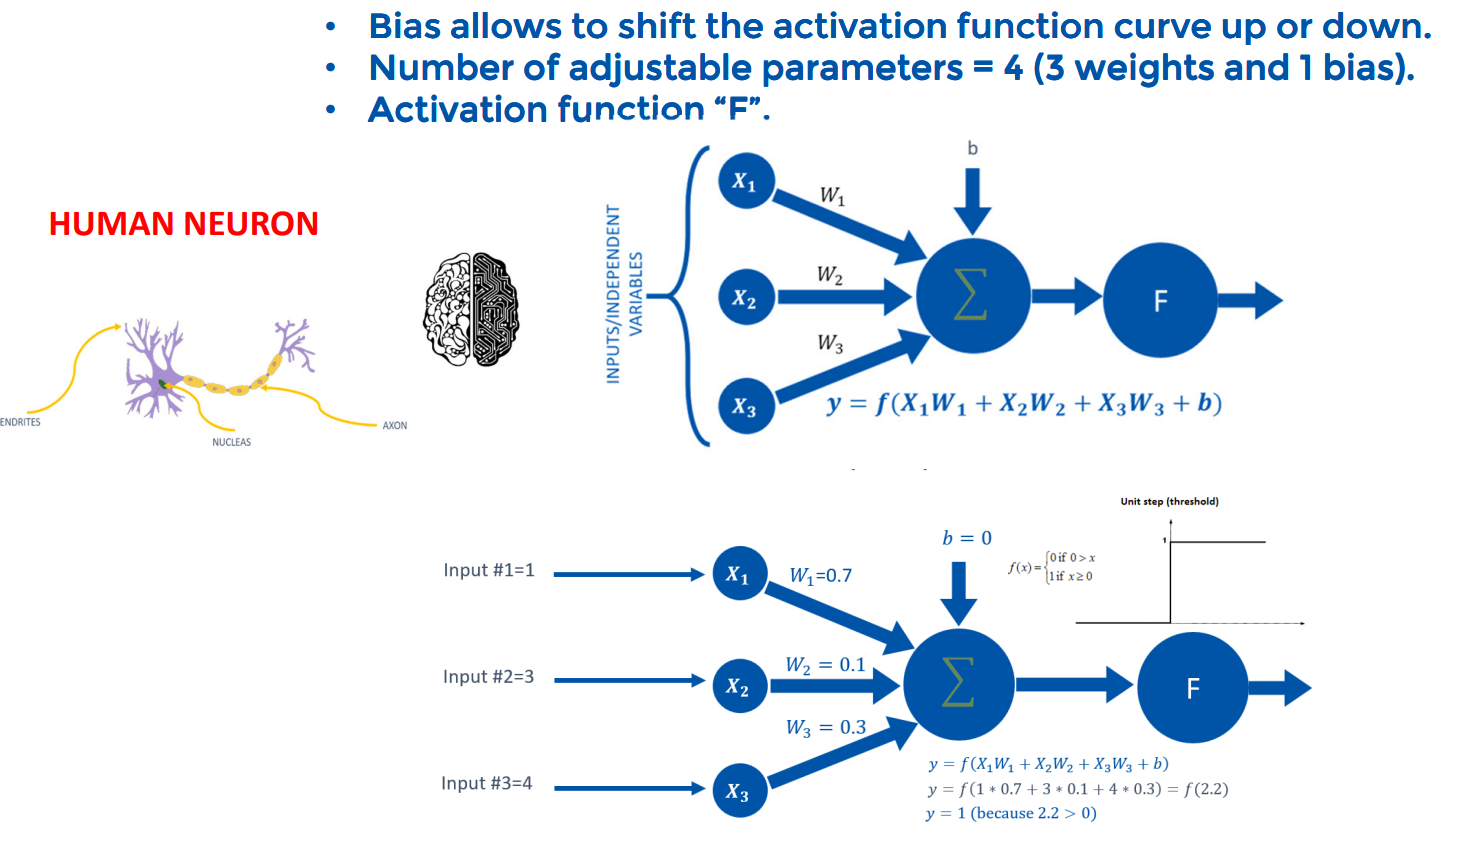

**MINI CHALLENGE #6:**
- List at least 3 types of activation functions, which type is preferred in the hidden layers?

**https://playground.tensorflow.org/**

**시그모이드: 0~1사이의 모든 수 0.2, 0.5 , 출력 layer에서  사용**  
**Relu:x가 음수=0 ,양수면 x 반환, 네트워크에 비선형성 도입**  
**Hyperbolic Tangent Function, tanh : -1~ 1 출력 layer에서 주로 사용**

**MINI CHALLENGE #7:**
- List at least 3 different neural networks architectures and their applications.

인공 신경망(Artificial Neural Network, ANN)
뉴런-> 층으로 구성 입략층, 은닉층, 출력층으로 구성 입력과 출력 연결

다층 퍼셉트론 (Multi-Layer Perceptron, MLP): MLP는 가장 기본적인 형태의 인공 신경망으로, 입력층, 하나 이상의 은닉층, 그리고 출력층으로 구성됩니다. MLP는 주로 분류와 회귀 문제에 사용되며, 특히 입력 데이터가 구조화된 형태일 때 유용합니다.

합성곱 신경망 (Convolutional Neural Network, CNN):  이미지 인식과 분류
합성곱 계층, 풀링 계층, 완전 연결 계층

순환 신경망 (Recurrent Neural Network, RNN):
래아어 안의 출력이 나오면 다시 입력으로 줌
시간 요소가 들어감 -> 다음 철자가 무엇이 올까? 등
                   자연어 처리, 음성 인식, 시계열 예측 등

# TASK #7: UNDERSTAND NEURAL NETWORKS TRAINING PROCESS AND GRADIENT DESCENT ALGORITHM

MINI CHALLENGE #8:
- What happen when you set the learning rate to the extremes (i.e.: very small value and very large value)? How can you achieve the best of both worlds?

**매우 작은 학습률** : 학습률이 너무 작게 설정되면 모델이 최상의 값으로 수렴하기 위해 많은 업데이트가 필요함, 너무 오래걸림  
**매우 큰 학습률**: 반면에 학습률이 너무 크게 설정되면 모델이 최적의 솔루션을 건너뛸 수 있습니다

 이를 막기 위해 적응형 학습률 사용

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS AND RESNETS

CNN의 어려운 점: **Layer 증가**시 합성곱, 다운샘플링 계속 반복 -> **기울기 소실**(실제 기울기가 너무 작아 가중치 업데이트 불가)-> 레이어가 증가해도 **네트워크 성능 하락** -> **ResNet 이용**

**ResNet이란** CNN의 유형 중 하나로 "skip connection"구조를 포함하여 입력 x를 가중치 레이어와 ReLu 활성화 함수에 직접 주고 x에identity mapping 추가하여 skip connection에서 입력을 그대로 출력으로 보내 출력에 대한 "**잔차**(residual)"를 학습하게 하여 vanishing gradient문제를 해결

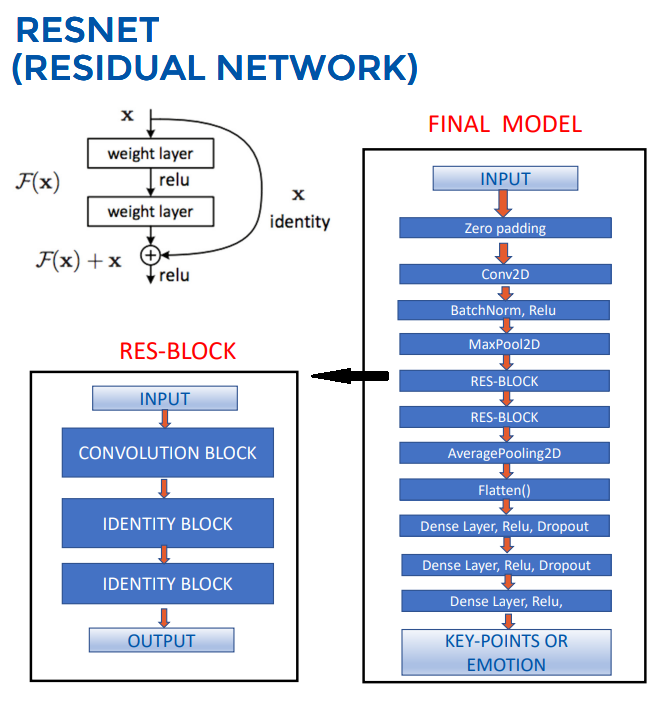

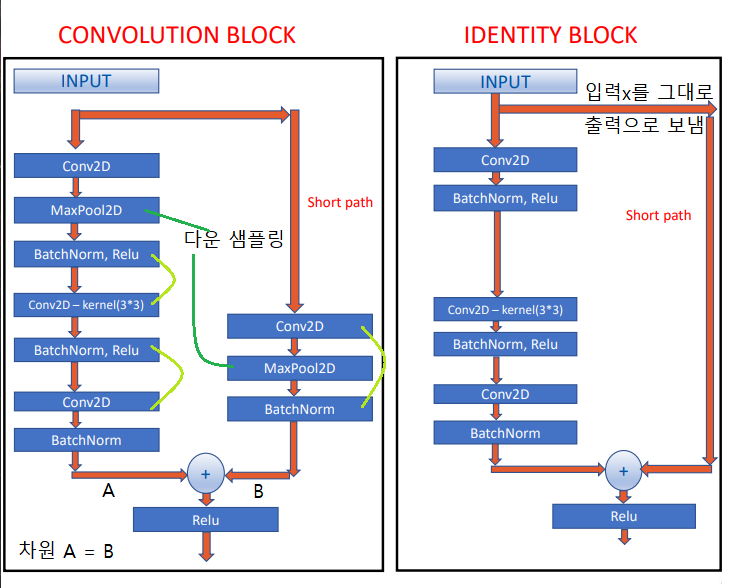

**MINI CHALLENGE #9:**
- What's the performance of ResNets compared to AlexNet in ImageNet dataset?

ResNets이 AlexNet보다 우수, not vanishing gradient & 152개 레이어(Alex는 8개)


https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33?gi=7bb6009bd672

# TASK #9: BUILD DEEP RESIDUAL NEURAL NETWORK KEY FACIAL POINTS DETECTION MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
def res_block(X, filter, stage):#입력X, filter Conv 레이어의 필터 수 배열, stage 블록 이름

  # Convolutional_block으로 shortcut connection에 사용
  X_copy = X
  f1, f2, f3 =  filter #Conv2D 레이어에서 사용할 필터 수를 정의


  #첫 번째 Conv Block

  # Main Path
  #1x1 크기의 필터를 사용하여 Conv2d 수행, 공간 정보 유지하면서 채널 수 조정, 가중치 glorat로 초기화
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  #  2x2 크기의 필터를 사용하는 Max pooling을 정의하여 X에 적용하는 downsampling 방법(공간 정보 유지ㅡ 이미지 차원 줄임)
  # 2D Convolution Layer의 출력은 4D 텐서 형태로, 이 텐서의 차원은 (batch_size, height, width, channels)으로
  X = MaxPool2D((2,2))(X)#axis =3은 채널로 같은 채널의 모든 픽셀에 대해 평균과
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)#BatchNormalization을 통해 값들을 정규화
  X = Activation('relu')(X) #ReLU 활성화 함수사용


  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)



  # Short path
  #3x3 크기의 필터를 사용하여 convolution을 수행
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD  #위에 Main과 Short 합치기
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X



  #두 번째 Identity Block
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  #세 번째 Identity Block
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X



In [ ]:

input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)  # 이 레이어를 최종 출력으로 지정해야 합니다.

# 모델 정의 및 레이어 추가
model_1_facialKeyPoints = Model(inputs=X_input, outputs=X)  # Here, X should be your final layer
model_1_facialKeyPoints.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 102, 102, 1)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_2[0][0]']       
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']            

MINI CHALLENGE #10:
- Experiment with changing the network architecture by removing 2 MaxPooling layers from the Res Block and train the model
- Try to add 'X = res_block(X, filter= [256,256,1024], stage= 4)' Block after stage #3 block.
- What did you observe? Comment on your answer

In [ ]:
def res_block(X, filter, stage):#입력X, filter Conv 레이어의 필터 수 배열, stage 블록 이름

  # Convolutional_block으로 shortcut connection에 사용
  X_copy = X
  f1, f2, f3 =  filter #Conv2D 레이어에서 사용할 필터 수를 정의


  #첫 번째 Conv Block

  # Main Path
  #1x1 크기의 필터를 사용하여 Conv2d 수행, 공간 정보 유지하면서 채널 수 조정, 가중치 glorat로 초기화
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  #  2x2 크기의 필터를 사용하는 Max pooling을 정의하여 X에 적용하는 downsampling 방법(공간 정보 유지ㅡ 이미지 차원 줄임)
  # 2D Convolution Layer의 출력은 4D 텐서 형태로, 이 텐서의 차원은 (batch_size, height, width, channels)으로
  #X = MaxPool2D((2,2))(X)#axis =3은 채널로 같은 채널의 모든 픽셀에 대해 평균과
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)#BatchNormalization을 통해 값들을 정규화
  X = Activation('relu')(X) #ReLU 활성화 함수사용


  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)



  # Short path
  #3x3 크기의 필터를 사용하여 convolution을 수행
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  #X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD  #위에 Main과 Short 합치기
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X



  #두 번째 Identity Block
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  #세 번째 Identity Block
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X


input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - stage
X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)  # 이 레이어를 최종 출력으로 지정해야 합니다.

# 모델 정의 및 레이어 추가
model_1_facialKeyPoints = Model(inputs=X_input, outputs=X)  # Here, X should be your final layer
model_1_facialKeyPoints.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 102, 102, 1)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_1[0][0]']       
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']            

# TASK #10: COMPILE AND TRAIN KEY FACIAL POINTS DETECTION DEEP LEARNING MODEL

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 2, validation_split = 0.05, callbacks=[checkpointer])



model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)

Epoch 1/2
153/153 [==============================] - ETA: 0s - loss: 185.5215 - accuracy: 0.4554
Epoch 1: val_loss improved from inf to 622.33142, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 52s 231ms/step - loss: 185.5215 - accuracy: 0.4554 - val_loss: 622.3314 - val_accuracy: 0.6537
Epoch 2/2
153/153 [==============================] - ETA: 0s - loss: 84.5536 - accuracy: 0.5358
Epoch 2: val_loss improved from 622.33142 to 228.82452, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 41s 268ms/step - loss: 84.5536 - accuracy: 0.5358 - val_loss: 228.8245 - val_accuracy: 0.6537


MINI CHALLENGE #11:
- Experiment with changing the batch size and validation split value and retrain the model (Take Home)

In [ ]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.1, callbacks=[checkpointer])


In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.05, callbacks=[checkpointer])



# TASK #11: ASSESS TRAINED KEY FACIAL POINTS DETECTION MODEL PERFORMANCE

In [ ]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [ ]:
# Evaluate the model

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 2s 15ms/step - loss: 8.3715 - accuracy: 0.8396
Accuracy : 0.8395638465881348


In [ ]:
# Get the model keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

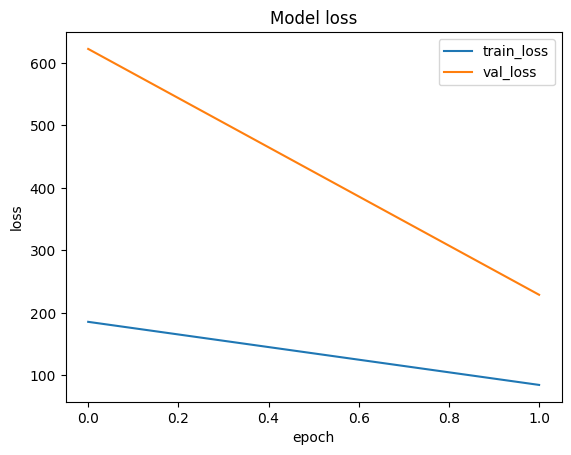

In [ ]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# **------------------------------------------**



# PART 2. FACIAL EXPRESSION DETECTION

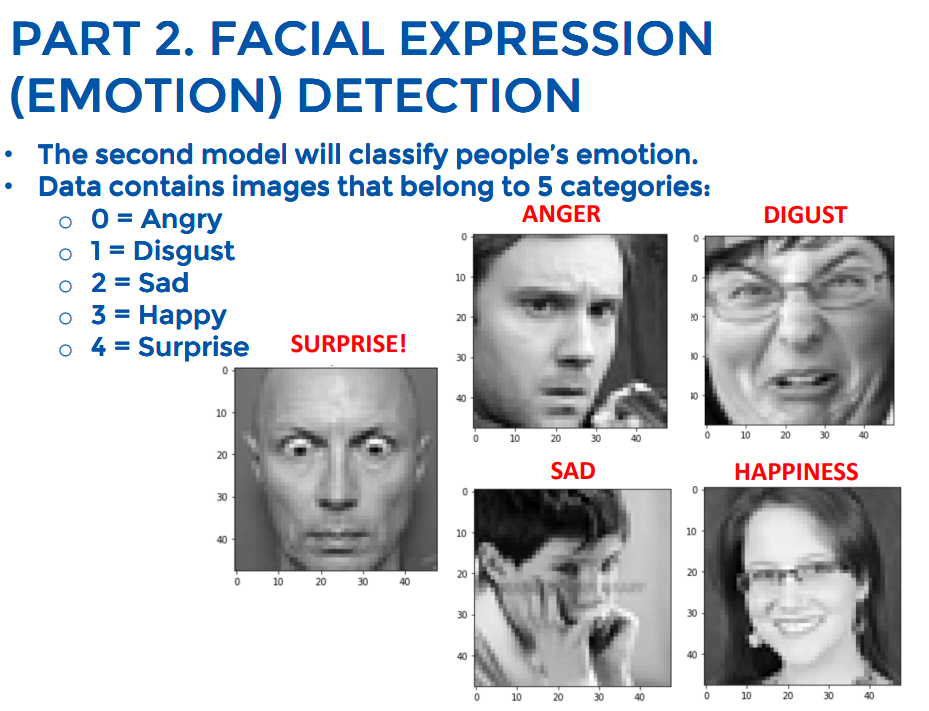

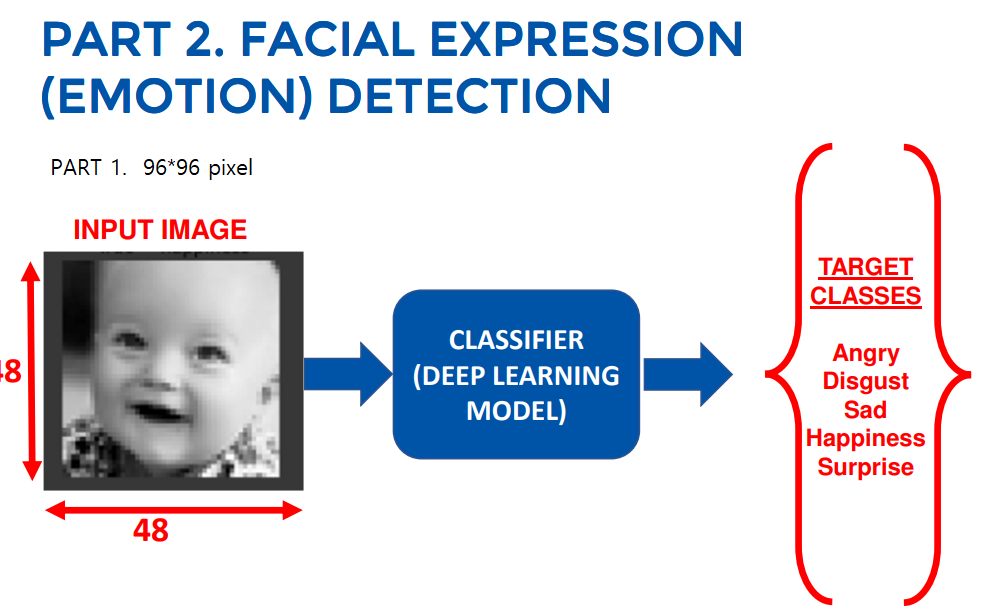

# TASK #12: IMPORT & EXPLORE DATASET FOR FACIAL EXPRESSION DETECTION

In [ ]:
facialex_df = pd.read_csv('icml_face_data.csv')

In [ ]:
facialex_df.head()

emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3        2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...

In [ ]:
facialex_df[' pixels'][0] #string format not 숫자

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
#convert  string -> array

def str2arr(x):  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32') #96 -> 48로

In [ ]:
def resize(x):# Resize images from (48, 48) to (96, 96)

  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)#interpolation  두 픽셀 사이를 연결 linear or cubic .etx

In [ ]:
facialex_df[' pixels'] = facialex_df[' pixels'].apply(lambda x: str2arr(x))

facialex_df[' pixels'][0]
**---------------**  

array([[[ 70.],
        [ 80.],
        [ 82.],
        ...,
        [ 52.],
        [ 43.],
        [ 41.]],

In [ ]:
facialex_df[' pixels'] = facialex_df[' pixels'].apply(lambda x: resize(x))

facialex_df[' pixels'][0]
**---------------**  
array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],

In [ ]:
facialex_df.head()

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...

In [ ]:
# check the shape of data_frame
facialex_df.shape

(24568, 2)

In [ ]:
# check for the presence of null values in the data frame
facialex_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
label_to_text={ 0:'anger', 1:'disgust',2:'sad',3:'happiness',4:'surprise'}

**MINI CHALLENGE #12:**
- Visualize the first image in the dataframe and make sure that the image is not distorted by resizing or reshaping operations

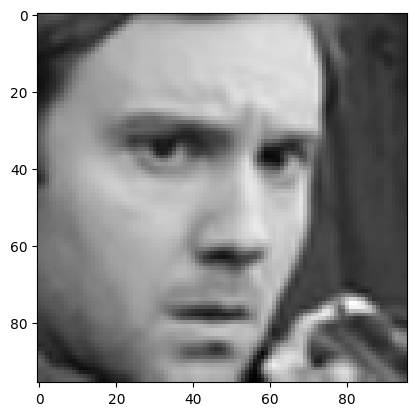

In [ ]:
plt.imshow(facialex_df[' pixels'][0], cmap = 'gray') #화질 깨짐 48->96 으로늘려서

'surprise'

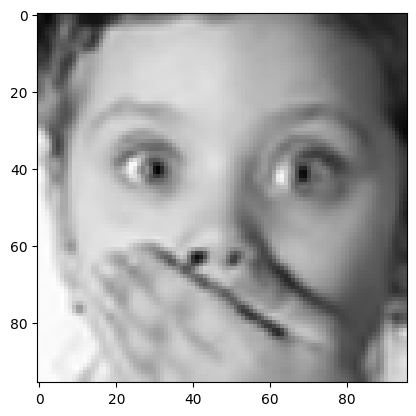

In [ ]:
i = np.random.randint(1, len(facialex_df))# 1~key_df의 길이 사이의 랜덤한 수
plt.imshow(facialex_df[' pixels'][i],cmap = 'gray') #이미지 출력
label_to_text[facialex_df['emotion'][i]]

# TASK #13: VISUALIZE IMAGES AND PLOT LABELS

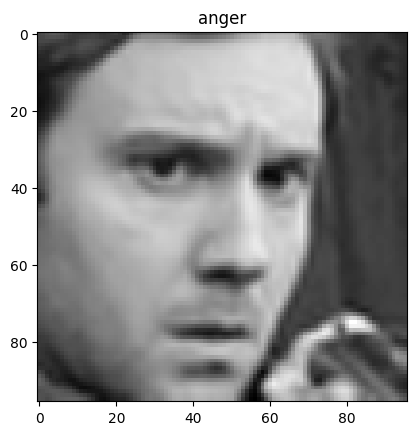

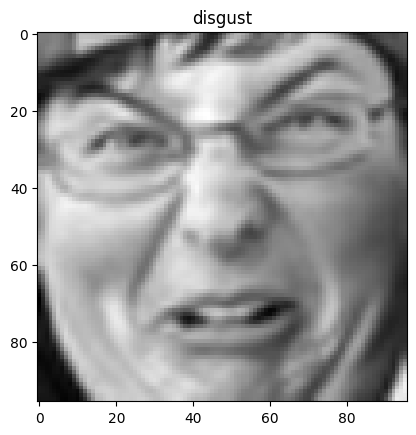

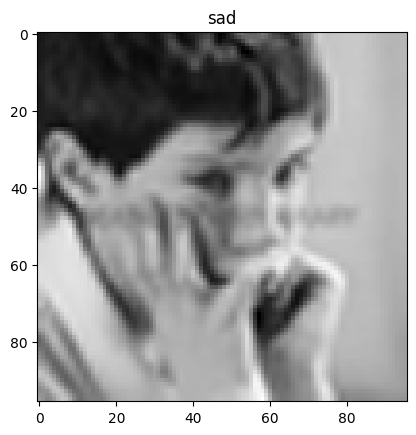

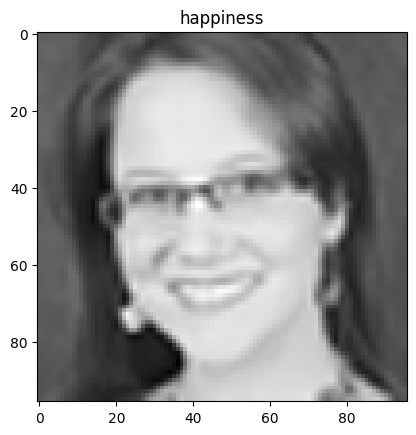

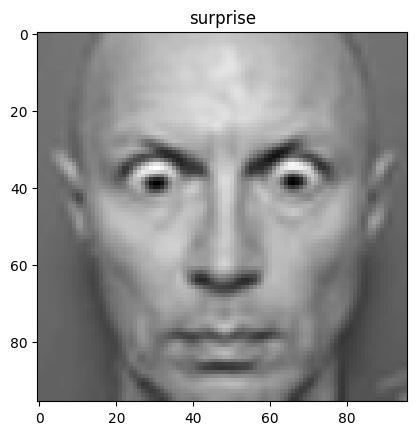

In [ ]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:#각 감정마다 사진 시각화
  data = facialex_df[facialex_df['emotion'] == i][:1]#emotion
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

MINI CHALLENGE #13:
- Plot bar chart to outline how many samples (images) are present per emotion  
각각 class에 대한 이미지들의 개수를 나타내는 막대 그래프 작성

In [ ]:
facialex_df.emotion.value_counts().index #인덱스만 나오므로

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [ ]:
facialex_df.emotion.value_counts() #각 인덱스당 몇 개인지

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

<Axes: ylabel='emotion'>

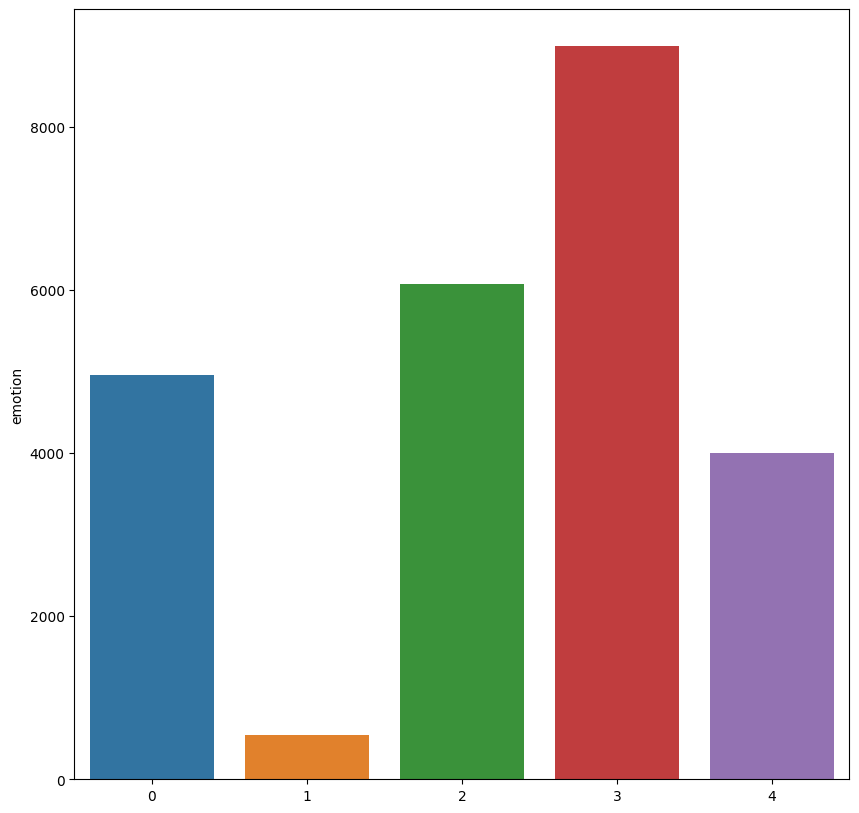

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=facialex_df.emotion.value_counts().index, y=facialex_df.emotion.value_counts())

결과를 보면 1 disgust만 이미지 개수가 너무 작기 때문에 문제가 생길 수 있음... so 이미지 증강 실행

# TASK #14: PERFORM DATA PREPARATION AND IMAGE AUGMENTATION

In [ ]:
# split the dataframe in to features and labels
from keras.utils import to_categorical

#입력:X 출력:y
X = facialex_df[' pixels']
y= to_categorical(facialex_df['emotion'])

In [ ]:
X #0 1 2... 24567 는 전부 사진

0        [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...
                               ...                        
24563    [[-4.901001, 5.6496277, 22.477203, 49.366516, ...
24564    [[181.71645, 179.72063, 176.40785, 175.93037, ...
24565    [[178.1166, 176.83118, 174.74146, 172.61276, 1...
24566    [[16.883408, 16.953583, 17.081573, 16.53476, 1...
24567    [[30.199814, 29.574478, 28.545822, 27.846603, ...
Name:  pixels, Length: 24568, dtype: object

In [ ]:
X[0] #첫 번째 이미지

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [ ]:
y #to_categorical을 사용해서 이미지의 감정에 해당하는 인덱스를 표시
#[1., 0., 0., 1., 0.],은 절대 불가

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:

X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)
#[X = 총이미지:24568, 각각의 이미지 96*96 pixel에 1]
#y = 총이미지:24568 , 감정클래스 5
print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True) #입력,출력, 학습90%테스트10%,
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)#테스트한 데이터를 가지고 한번 더 학습50:테스트50으로


In [ ]:
print(X_val.shape, y_val.shape) #1200개의  샘플을 검증에 사용

(1228, 96, 96, 1) (1228, 5)


In [ ]:
print(X_Test.shape, y_Test.shape) #1200개에 테스트

(1229, 96, 96, 1) (1229, 5)


In [ ]:
print(X_train.shape, y_train.shape) #학습에 22000개의 사진

(22111, 96, 96, 1) (22111, 5)


In [ ]:
# image pre-processing
#0-255까지를 0-1로 변경
X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
X_test

array([[[[0.96862745],
         [0.95686275],
         [0.98039216],
         ...,
         [0.7647059 ],
         [0.76862746],
         [0.7647059 ]],

        [[0.9647059 ],
         [0.95686275],
         [0.9764706 ],
         ...,
         [0.7607843 ],
         [0.7647059 ],
         [0.7607843 ]],

        [[0.9647059 ],
         [0.95686275],
         [0.9843137 ],
         ...,
         [0.7647059 ],
         [0.7647059 ],
         [0.7607843 ]],

        ...,

        [[0.20392157],
         [0.24705882],
         [0.27058825],
         ...,
         [0.20784314],
         [0.22352941],
         [0.23137255]],

        [[0.20392157],
         [0.24705882],
         [0.25490198],
         ...,
         [0.2       ],
         [0.21960784],
         [0.22745098]],

        [[0.21960784],
         [0.2509804 ],
         [0.23529412],
         ...,
         [0.19215687],
         [0.21960784],
         [0.22745098]]],


       [[[1.        ],
         [1.        ],
         [1.  

In [ ]:
X_train

array([[[[ 1.0376383e+00],
         [ 8.7885785e-01],
         [ 6.2183988e-01],
         ...,
         [ 9.2927444e-01],
         [ 9.2907733e-01],
         [ 9.2895454e-01]],

        [[ 9.2697674e-01],
         [ 7.7222347e-01],
         [ 5.2053702e-01],
         ...,
         [ 9.2972130e-01],
         [ 9.3013501e-01],
         [ 9.3039393e-01]],

        [[ 7.4919295e-01],
         [ 5.9983581e-01],
         [ 3.5489526e-01],
         ...,
         [ 9.3046242e-01],
         [ 9.3187892e-01],
         [ 9.3276483e-01]],

        ...,

        [[ 9.3128628e-01],
         [ 8.8212019e-01],
         [ 8.0261910e-01],
         ...,
         [ 9.3686348e-01],
         [ 9.3742585e-01],
         [ 9.3783182e-01]],

        [[ 8.5718602e-01],
         [ 8.0993521e-01],
         [ 7.3240501e-01],
         ...,
         [ 9.3165451e-01],
         [ 9.3374956e-01],
         [ 9.3499893e-01]],

        [[ 8.1250465e-01],
         [ 7.6600063e-01],
         [ 6.8898010e-01],
         ...,
 

In [ ]:
train_datagen = ImageDataGenerator( #이미지 증강
rotation_range = 15, #15도
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")


MINI CHALLENGE #14:
- Try at least 2 additional data augmentation techniques

noise, rotate, 밝기, translation
https://keras.io/ko/preprocessing/image/

In [ ]:
train_datagen = ImageDataGenerator(  #이미지 증강
rotation_range = 15, #15도
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,

    vertical_flip = True,
                                     brightness_range = [1.1, 1.5],
    fill_mode = "nearest")


# TASK #15: BUILD AND TRAIN DEEP LEARNING MODEL FOR FACIAL EXPRESSION CLASSIFICATION

얼굴 표정분류를 위해 심층 학습 모델을 구축하고 학습

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)


# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X) #kernel_initializer : 초기값 무작위 대신 glorotform로 내
#감정이 5개이므로 5로 설정 softmax는 범위가 -1 ~ 1으로 확률로 사용가능
model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()


Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 102, 102, 1)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_3[0][0]']       
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']           

In [ ]:
# train the network
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Recall that the first facial key points model was saved as follows: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
#20번째 까지 validation loss의 개선 X -> stop

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)
#ModelCheckpoint 기징 검증 손실이 적은 최적의 모델 저장 네트워크 가중치.hdf5에 저장

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 2, callbacks=[checkpointer, earlystopping])
#train_datagen 위에서 쓴 이미지 증강

Epoch 1/2
345/345 [==============================] - ETA: 0s - loss: 1.6290 - accuracy: 0.4507
Epoch 1: val_loss improved from inf to 1.39587, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 86s 148ms/step - loss: 1.6290 - accuracy: 0.4507 - val_loss: 1.3959 - val_accuracy: 0.4080
Epoch 2/2
345/345 [==============================] - ETA: 0s - loss: 1.0049 - accuracy: 0.5958
Epoch 2: val_loss improved from 1.39587 to 0.99363, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 48s 140ms/step - loss: 1.0049 - accuracy: 0.5958 - val_loss: 0.9936 - val_accuracy: 0.6083


In [ ]:
# saving the model architecture to json file for future use

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

MINI CHALLENGE #15:
- Experiment with various batch size, patience, optimizers, and network architecture to improve network performance (Take home)

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)


# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [128, 128, 512], stage= 2)

# 3 - stage
X = res_block(X, filter= [256, 256, 1024], stage= 3)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X) #kernel_initializer : 초기값 무작위 대신 glorotform로 내
#감정이 5개이므로 5로 설정 softmax는 범위가 -1 ~ 1으로 확률로 사용가능
model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

# train the network
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=128),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,	epochs= 5, callbacks=[checkpointer, earlystopping])


# TASK #16: UNDERSTAND HOW TO ASSESS CLASSIFIER MODELS (CONFUSION MATRIX, ACCURACY, PRECISION, AND RECALL)

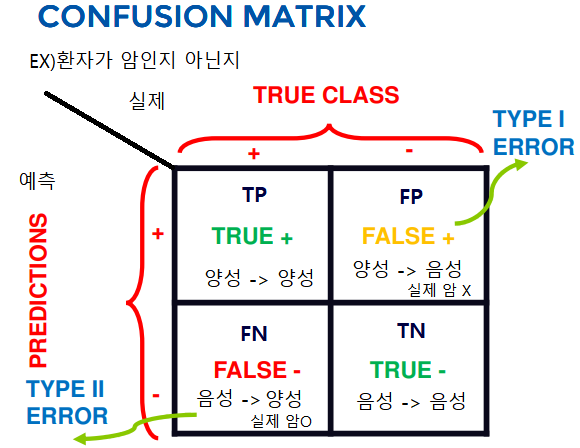

TYPE1은 큰 문제는 X BUT, TYPE2는 큰 문제

혼동행렬은 분류모델의 성능 설명을 위해 사용

o Classification **Accuracy** = (TP+TN) / (전체: TP + TN + FP + FN)  
o Misclassification rate (**Error Rate**) = (FP + FN) / (전체: TP + TN + FP + FN)  
o Precision**(정밀도) = TP/ 예측 TRUE**=
 TP/Total TRUE Predictions = TP/ (TP+FP) (When model predicted TRUE class, how often was it right?)  
o Recall**(재현율) =TP/ 실제 TRUE** = TP/ Actual TRUE = TP/ (TP+FN) (when the class was actually
TRUE, how often did the classifier get it right?)  

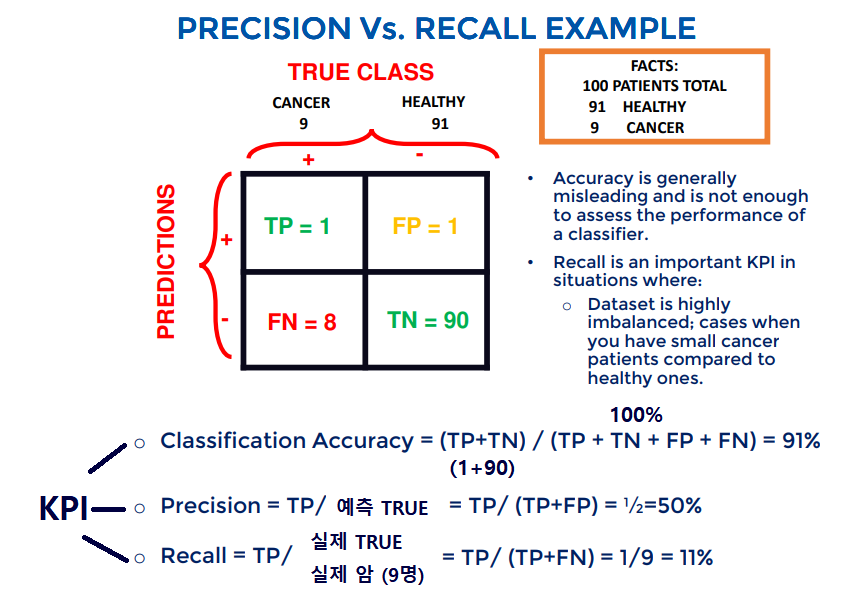

KPI 가 낮아서 사용할 수 없는 모델

# TASK #17: ASSESS THE PERFORMANCE OF TRAINED FACIAL EXPRESSION CLASSIFIER MODEL

In [ ]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()#모델 구조 : 로드하고 저장 OR 훈련된 가중치들 실제 값

# load the model architecture
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy: {}'.format(score[1]))

39/39 [==============================] - 1s 16ms/step - loss: 0.3255 - accuracy: 0.8771
Test Accuracy: 0.8771358728408813


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

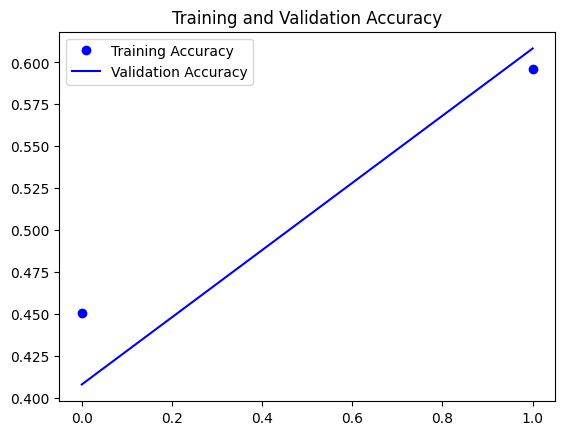

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

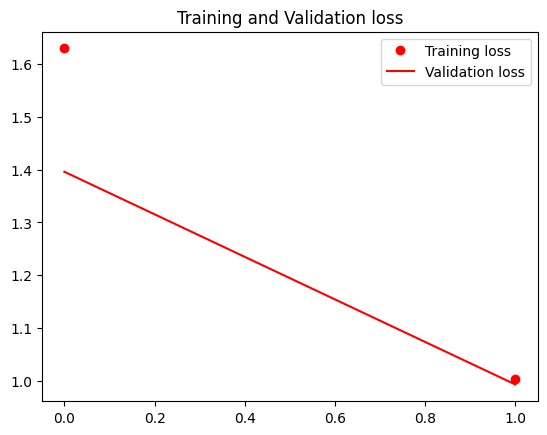

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

39/39 [==============================] - 1s 7ms/step


In [ ]:
y_true.shape

(1229,)

<Axes: >

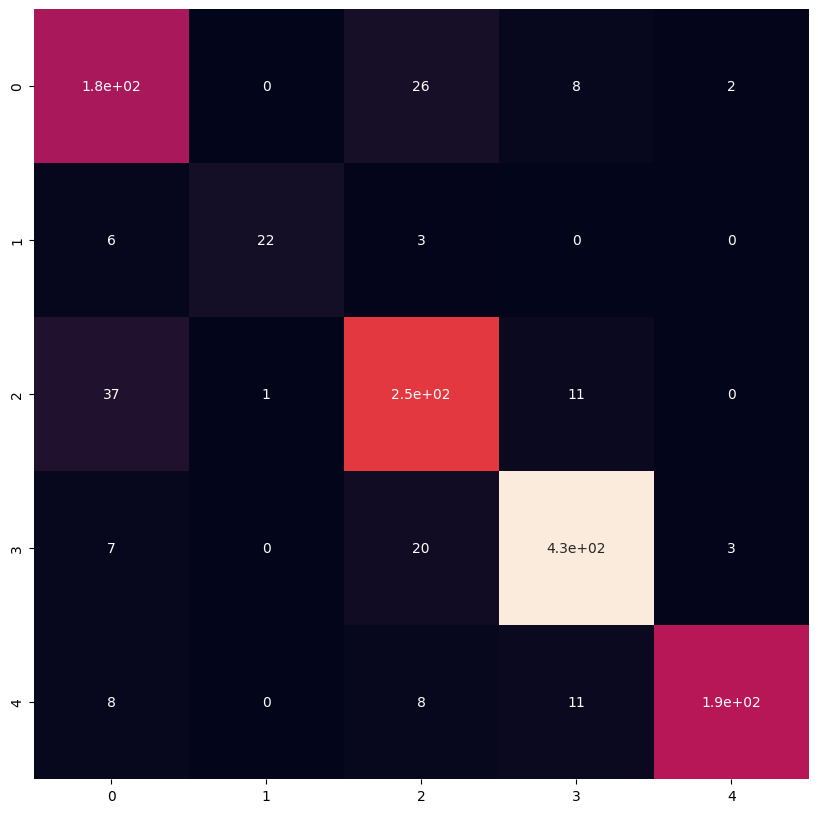

In [ ]:
from sklearn.metrics import confusion_matrix
#혼동행렬
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

대각선 모델 예측이 True 클래스와 부합  대각선 제외는 잘못 예측된 값들

MINI CHALLENGE #16:
- Print out a grid of 25 images along with their predicted/true label

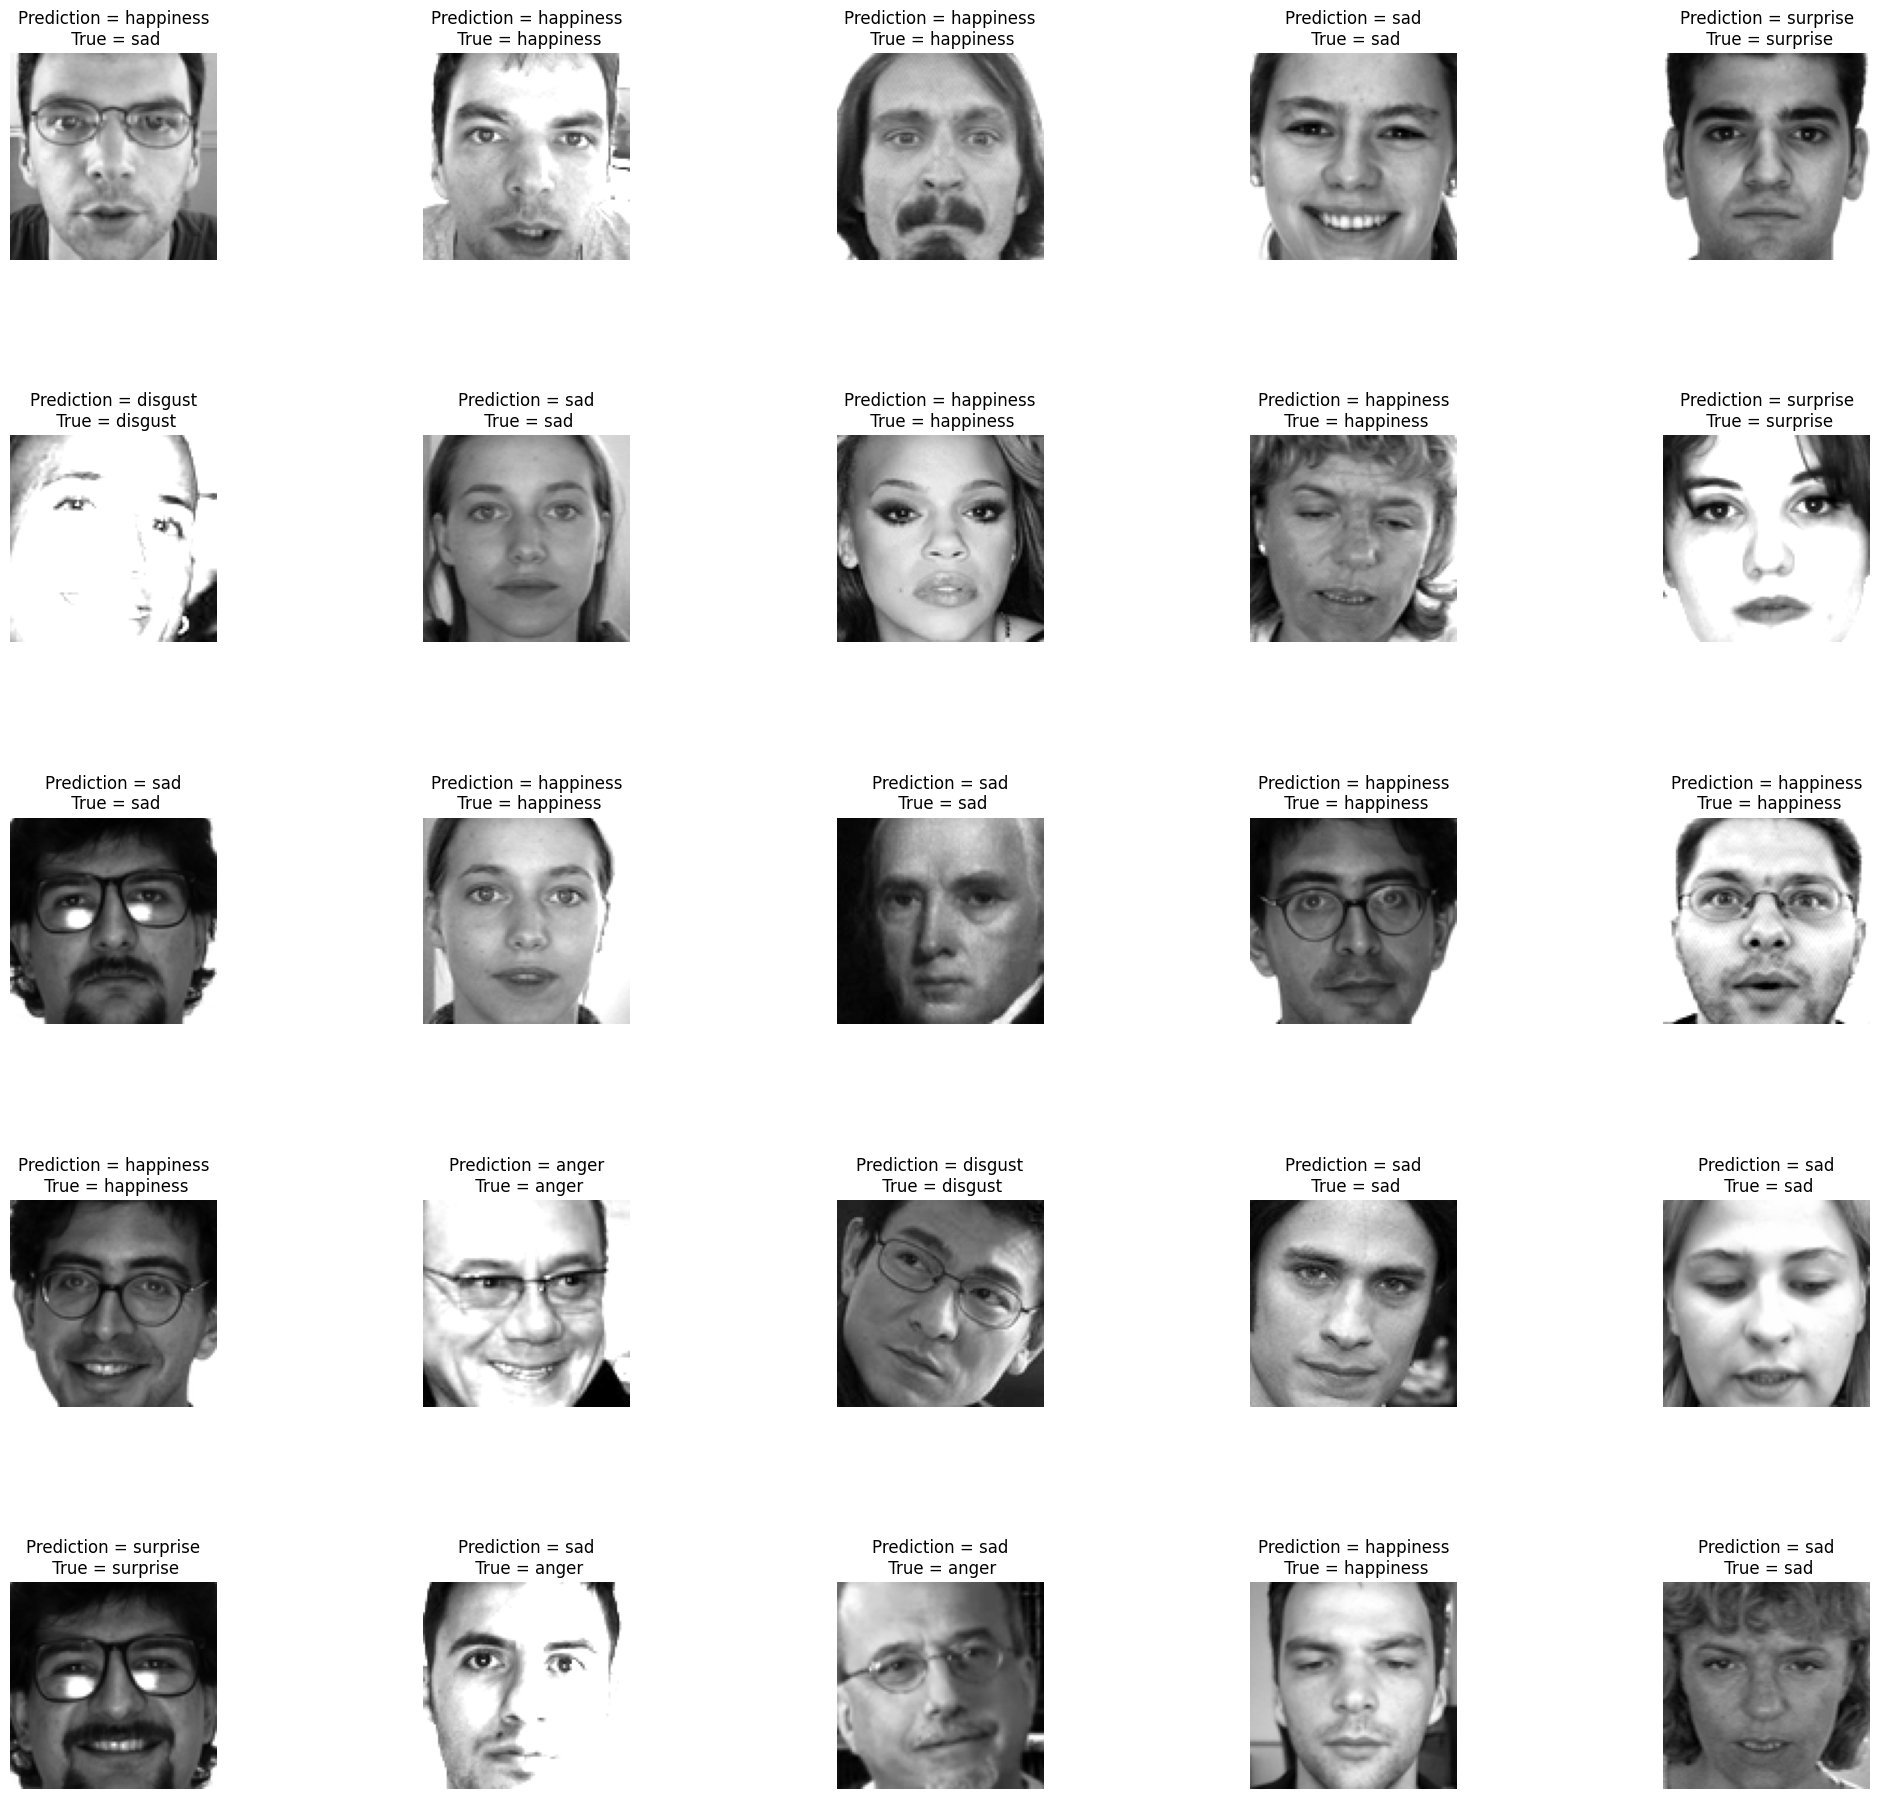

In [ ]:
l = 5
w = 5
fig, axes = plt.subplots(l,w, figsize = (24, 24))
axes = axes.ravel()
for i in np.arange(0,25):
  axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
  axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))

  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)


- Print out the classification report and analyze precision and recall

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       215
           1       0.96      0.71      0.81        31
           2       0.82      0.84      0.83       301
           3       0.93      0.93      0.93       461
           4       0.97      0.88      0.92       221

    accuracy                           0.88      1229
   macro avg       0.89      0.84      0.86      1229
weighted avg       0.88      0.88      0.88      1229



class 1의 성능이 가장 떨어짐 why? 데이터 셋 자체가 작음  
  해결방법 더 많은 데이터 수집 OR 이미지 증강

# PART 3. COMBINE BOTH FACIAL EXPRESSION AND KEY POINTS DETECTION MODELS

# TASK #18: COMBINE BOTH MODELS (1) FACIAL KEY POINTS DETECTION AND (2) FACIAL EXPRESSION MODELS

주요 얼굴 포인트 모델 + 감정 인식 모델 합치기

In [ ]:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1) #형태 [0,0,1,0,0] 5개 중 가장 높은 예측결과 나옴

  print(df_emotion)
  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

41/41 [==============================] - 0s 5ms/step
[0 4 4 ... 0 3 2]


In [ ]:
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          68.521645          33.456837           27.826077   
1          69.519547          40.106270           30.151451   
2          66.178391          39.654476           32.262768   
3          28.559992          35.925816           69.667122   
4          65.986069          37.336250           29.779333   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           33.198456                62.037754                33.978561   
1           37.235336                62.362034                40.406521   
2           39.423477                60.441940                40.140621   
3           37.566475                37.476280                37.163883   
4           37.181522                58.136047                38.431366   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                74.561714                34.370869                 34.042156   
1                76.009308                41.560619                 36.554199   
2                71.753052                40.218296                 37.432774   
3                19.015429                36.011990                 60.406948   
4                74.258354                38.439415                 37.674843   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 33.559608  ...   53.627266            63.476135   
1                 38.273300  ...   58.914902            62.440468   
2                 39.890350  ...   58.442993            62.821369   
3                 37.893311  ...   60.317394            25.003872   
4                 38.055191  ...   58.317158            63.612160   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            75.102966             33.747688             75.128288   
1            82.084702             31.388033             80.541298   
2            78.608727             33.437534             78.454178   
3            72.646286             70.835625             74.726395   
4            77.111595             32.544930             77.293434   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               47.980129               71.726105                  48.194622   
1               47.051956               76.607002                  46.537838   
2               47.557861               72.755745                  47.551731   
3               47.830956               73.431808                  47.465424   
4               48.150238               75.150955                  48.304901   

   mouth_center_bottom_lip_y  emotion  
0                  83.550522        0  
1                  90.657242        4  
2                  86.422295        4  
3                  87.736237        3  
4                  80.661659        1  

[5 rows x 31 columns]

MINI CHALLENGE #17:
- Plot a grid of 16 images along with their predicted emotion and facial key points

In [ ]:
l = 4
w = 4
fig, axes = plt.subplots(l,w, figsize = (24, 24))
axes = axes.ravel()
for i in np.arange(16):
  axes[i].imshow(X_test[i].squeeze(), cmap = 'gray')
  axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
  axes[i].axis('off')
  for j in range(1,31,2):
    axes[i].plot(df_predict.loc[i][j-1],df_predict.loc[i][j],'rx')



# PART 4. DEPLOY BOTH TRAINED MODELS

배포

# TASK #19. SAVE THE TRAINED MODEL FOR DEPLOYMENT

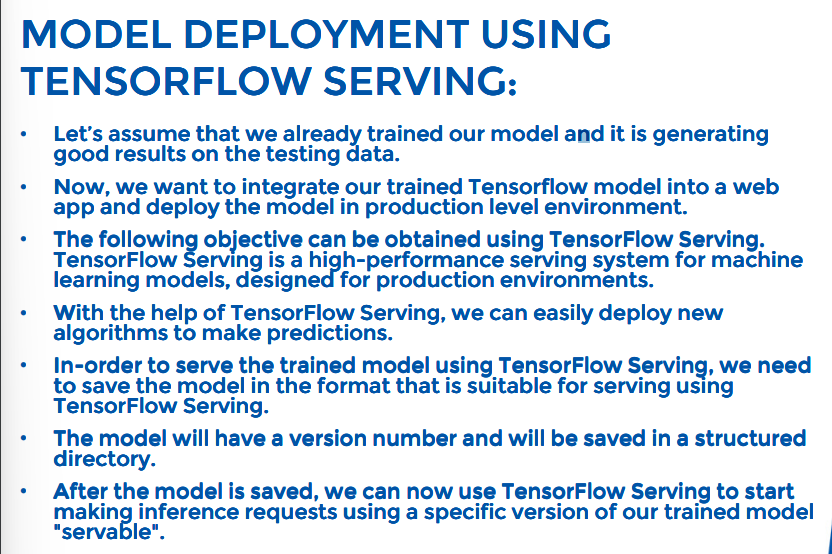

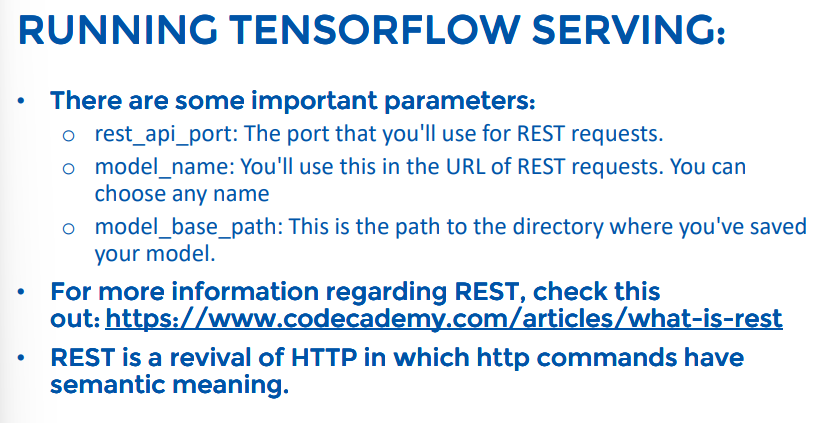

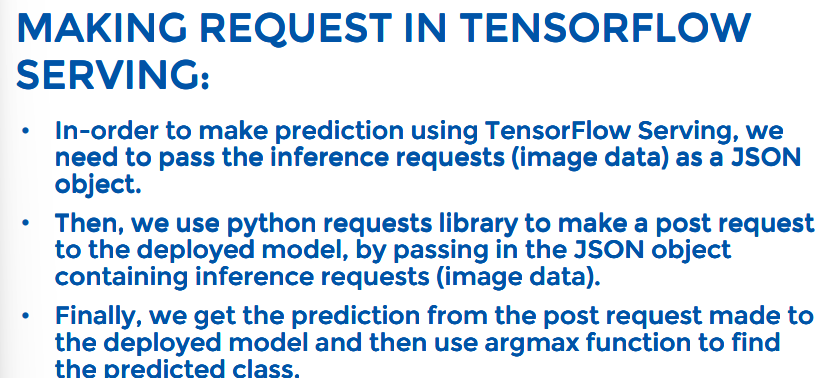

- We now need to save our trained model and it has to be saved in a SavedModel format.
- The model will have a version number and will be saved in a structured directory
- tf.saved_model.save is a function used to build a saved model that is suitable for serving using Tensorflow Serving.
- After the model is saved, we can now use TensorFlow Serving to start making inference requests using a specific version of our trained model "servable".
- Use SavedModel to save and load your model—variables, the graph, and the graph's metadata.
          
- Check this out for more information:
https://www.tensorflow.org/guide/saved_model

In [ ]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model): #디렉토리와 버전 생성
  MODEL_DIR = directory
  version = 1 #두 모델에 대해 1개버전이므로 1로 설정

  # Let's join the temp model directory with our chosen version number
  # The expected result will be = '\tmp\version number'
  #저장 경로 지정
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  # Let's save the model using saved_model.save
  # If the directory already exists, we will remove it using '!rm'
  # rm removes each file specified on the command line.

  if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

  #모델 저장
  tf.saved_model.save(model, export_path)

  os.environ["MODEL_DIR"] = MODEL_DIR

# TASK #20. SERVE THE MODEL USING TENSORFLOW SERVING

In [ ]:
# tensorflow-model-server package를 패키지 리스트에 추가해서 실 사용 가능하게 해줌
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  13080      0 --:--:-- --:--:-- --:--:-- 13080
OK
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB

In [ ]:
# Let's install tensorflow model server
!apt-get remove tensorflow-model-server
!apt-get install tensorflow-model-server


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'tensorflow-model-server' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 430 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.12.1 [430 MB]
Fetched 430 MB in 14s (30.1 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.12.1_all.deb ...
Unpacking tensorflow-model-server (2.12.1) ...
Setting up tensorf

# Let's run TensorFlow serving
- We will load our model and start making inferences (predictions) based on it.
- There are some important parameters:

  - rest_api_port: The port that you'll use for REST requests.
  - model_name: You'll use this in the URL of REST requests. You can choose any name
  - model_base_path: This is the path to the directory where you've saved your model.
  
- For more information regarding REST, check this out:
https://www.codecademy.com/articles/what-is-rest
- REST is a revival of HTTP in which http commands have semantic meaning.

In [ ]:
deploy('/model', model_1_facialKeyPoints)#두개의 모델이 존재하므로 deploy가 2번 사용됨

export_path = /model/1



In [ ]:
#3가지 ( ) 지정
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

2023-07-14 06:55:27.413040: W external/org_tensorflow/tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-07-14 06:55:27.441685: W external/org_tensorflow/tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


In [ ]:
deploy('/model1', model_2_emotion)

export_path = /model1/1



In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


# TASK #21: MAKE REQUESTS TO MODEL IN TENSORFLOW SERVING

In [ ]:
import json

# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 096], [0.7251088619232178], [0.7930877804756165]]]]}


In [ ]:
!pip install -q requests

In [ ]:
import requests

# Function to make predictions from deployed models
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
# making prediction
df_predict = response(data)

In [ ]:
df_predict

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          68.521637          33.456837           27.826073   
1          69.519547          40.106274           30.151449   
2          66.178391          39.654480           32.262764   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           33.198456                62.037750                33.978565   
1           37.235340                62.362045                40.406525   
2           39.423473                60.441933                40.140629   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                74.561714                34.370872                 34.042152   
1                76.009308                41.560615                 36.554203   
2                71.753036                40.218288                 37.432774   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 33.559605  ...   53.627270            63.476135   
1                 38.273292  ...   58.914900            62.440475   
2                 39.890346  ...   58.442993            62.821358   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            75.102974             33.747696             75.128288   
1            82.084717             31.388035             80.541313   
2            78.608742             33.437534             78.454193   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               47.980129               71.726090                  48.194618   
1               47.051960               76.606995                  46.537830   
2               47.557857               72.755760                  47.551735   

   mouth_center_bottom_lip_y  emotion  
0                  83.550529        0  
1                  90.657234        4  
2                  86.422287        4  

[3 rows x 31 columns]

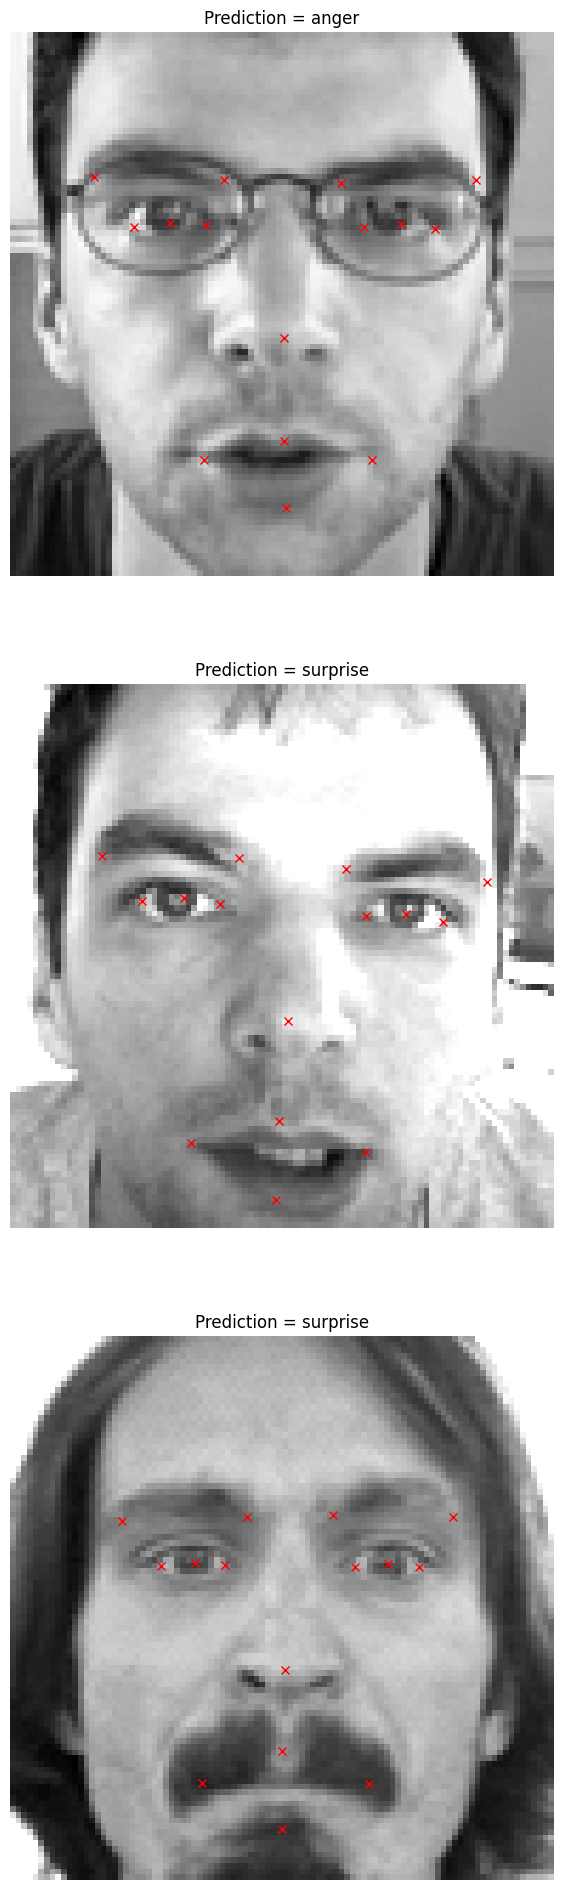

In [ ]:
# Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
